# TASK - 1:

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
train = pd.read_csv("D://M_AI//AI Capstone//Ecommerce//train_data.csv")
test_val = pd.read_csv("D://M_AI//AI Capstone//Ecommerce//test_data_hidden.csv")
test = pd.read_csv("D://M_AI//AI Capstone//Ecommerce//test_data.csv")
train.shape, test_val.shape, test.shape

((4000, 8), (1000, 8), (1000, 7))

In [3]:
train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [4]:
#Checking for null values
train.isnull().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

In [5]:
#using bfill method to remove the null values
train.fillna(method='bfill',axis=0, inplace = True)
train.isnull().sum()

name                 0
brand                0
categories           0
primaryCategories    0
reviews.date         0
reviews.text         0
reviews.title        0
sentiment            0
dtype: int64

In [6]:
#Checking the sentiment value counts
train['sentiment'].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

In [7]:
#Checking the name value counts
pd.DataFrame(train.name.value_counts())

,name
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",372
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",135
"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum",89


In [8]:
#Checkin value counts for each class
cols = ['name','brand','categories','primaryCategories','reviews.date','reviews.text','reviews.title','sentiment']
for i in cols:
    p = pd.DataFrame(train[i].value_counts())
    print(p)

                                                    name
Amazon Echo Show Alexa-enabled Bluetooth Speake...   676
All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi,...   628
Amazon - Echo Plus w/ Built-In Hub - Silver          483
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...   446
Brand New Amazon Kindle Fire 16gb 7" Ips Displa...   372
Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes...   294
Amazon Tap - Alexa-Enabled Portable Bluetooth S...   177
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 ...   175
Kindle E-reader - White, 6 Glare-Free Touchscre...   135
Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 G...    89
Fire Tablet with Alexa, 7" Display, 16 GB, Mage...    80
Amazon Kindle E-Reader 6" Wifi (8th Generation,...    76
Amazon - Kindle Voyage - 6" - 4GB - Black             65
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, ...    57
All-New Fire HD 8 Tablet, 8" HD Display, Wi-Fi,...    45
Fire HD 8 Tablet with Alexa, 8" HD Display, 32 ...    43
All-New Fire HD 8 Tablet, 8 HD 

In [9]:
#define a function to clean the sentence
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer

ps = PorterStemmer()

def clean_text(text):
    wt = word_tokenize(text)
    text = [word for word in text if word not in string.punctuation]
    text = ''.join(text)
    text = [ps.stem(word) for word in text.split() if word.lower() not in stopwords.words('english')]
    return text

In [10]:
#Cleaning the Train Dataset

#Use Tfidf vectorizer to convert into features
reviews_train = TfidfVectorizer(analyzer = clean_text).fit(train['reviews.text'])
print(len(reviews_train.vocabulary_))
reviews_train_transform = reviews_train.transform(train['reviews.text'])

3981


In [11]:
# Storing the reviews using Tfidf Transformer
train_tfidf_trans = TfidfTransformer().fit(reviews_train_transform)
reviews_train_tfidf = train_tfidf_trans.transform(reviews_train_transform)
print(reviews_train_tfidf.shape)

words_train = reviews_train.get_feature_names()
print(words_train)

(4000, 3981)
['1', '10', '100', '1000', '101', '1013', '1080', '10th', '10x', '10yearold', '11', '1120', '11yr', '12', '120', '128', '128gb', '12999', '13', '13th', '14', '149', '14pound', '15', '150', '15000', '15inabl', '16', '16g', '16gb', '17', '18', '18i', '19', '199', '1click', '1gb', '1gig', '1st', '1weeki', '1yr', '2', '20', '200', '2003', '200gb', '2014', '2015', '2016', '2017', '2040', '20gb', '21', '23', '247', '25', '256', '25x', '2inch', '2nd', '2year', '2yr', '3', '30', '300', '30sec', '32', '32g', '32gb', '33', '34', '37', '384xx', '3G', '3rd', '3year', '3yo', '3yr', '4', '40', '45', '46kindl', '49', '499', '4K', '4g', '4gig', '4k', '4th', '4yr', '5', '50', '500', '500ish', '510', '55', '56', '59', '5999', '5th', '5yo', '6', '60', '6070', '64', '64gb', '65', '68', '69', '6999', '6year', '6yo', '6yr', '7', '70', '70he', '720p', '75', '750', '77', '78', '79', '7I', '7inch', '7th', '7year', '8', '80', '810', '83', '830', '84', '85', '86', '87', '88', '89', '8G', '8gb', '8in

In [12]:
#Cleaning the Test_val data Set

#Use Tfidf vectorizer to convert into features
reviews_testval = TfidfVectorizer(analyzer = clean_text).fit(test_val['reviews.text'])
print(len(reviews_testval.vocabulary_))
reviews_testval_transform = reviews_testval.transform(test_val['reviews.text'])

# Storing the reviews using Tfidf Transformer
testval_tfidf_trans = TfidfTransformer().fit(reviews_testval_transform)
reviews_testval_tfidf = testval_tfidf_trans.transform(reviews_testval_transform)
print(reviews_testval_tfidf.shape)

2234
(1000, 2234)


In [13]:
#Cleaning the Test data Set

#Use Tfidf vectorizer to convert into features
reviews_test = TfidfVectorizer(analyzer = clean_text).fit(test['reviews.text'])
print(len(reviews_test.vocabulary_))
reviews_test_transform = reviews_test.transform(test['reviews.text'])

# Storing the reviews using Tfidf Transformer
test_tfidf_trans = TfidfTransformer().fit(reviews_test_transform)
reviews_test_tfidf = test_tfidf_trans.transform(reviews_test_transform)
print(reviews_test_tfidf.shape)

2234
(1000, 2234)


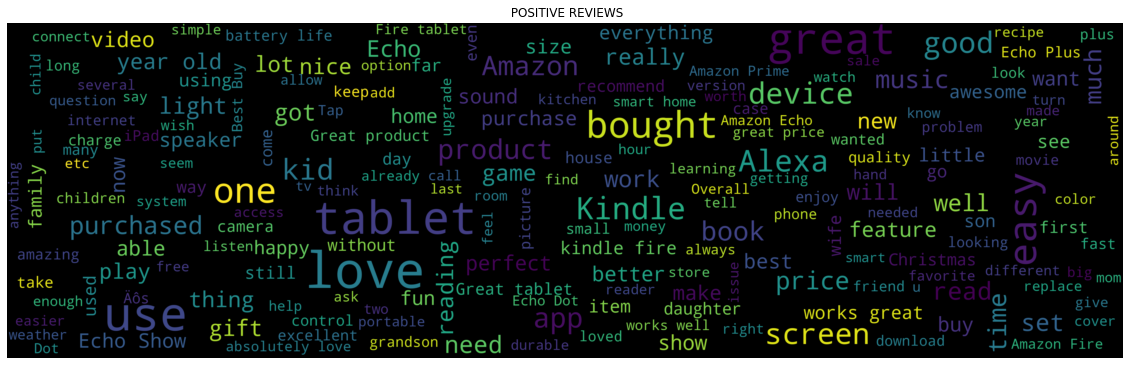

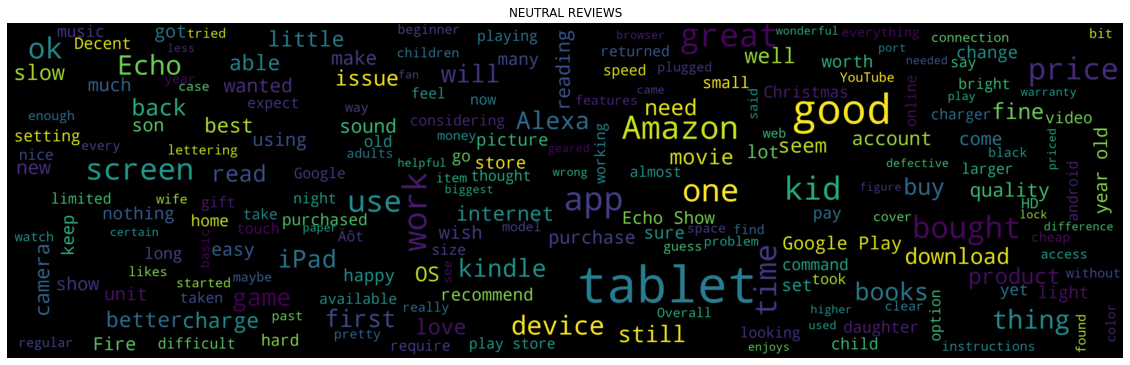

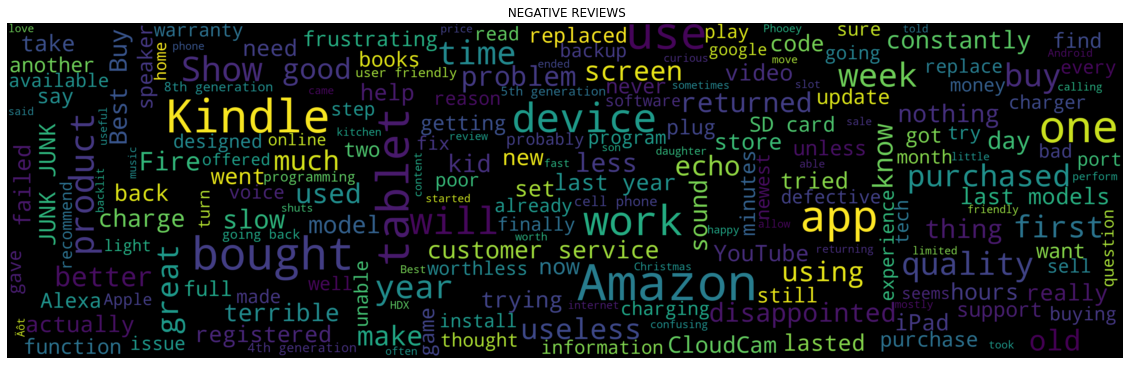

In [14]:
from wordcloud import WordCloud, STOPWORDS 

#all_text = ' '.join([text for text in train['reviews.text']])
pos_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Positive']])
neg_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Negative']])
neu_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Neutral']])

##########################

wordcloud = WordCloud(width=4000, height=1200, random_state=21, max_font_size=180).generate(pos_text)
plt.figure(figsize=(20,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' POSITIVE REVIEWS')
plt.show()

##########################

wordcloud = WordCloud(width=4000, height=1200, random_state=21,max_font_size=180).generate(neu_text)
plt.figure(figsize=(20,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('NEUTRAL REVIEWS')
plt.show()

##########################

wordcloud = WordCloud(width=4000, height=1200, random_state=21,max_font_size=180).generate(neg_text)
plt.figure(figsize=(20,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' NEGATIVE REVIEWS')
plt.show()


In [15]:
# Split the data for classification
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( reviews_train_tfidf,train.sentiment,train_size=0.8,random_state = 123 )

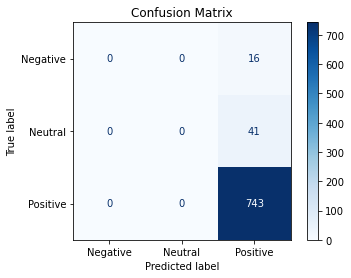

Naive Bayes Classification Report:

               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        16
     Neutral       0.00      0.00      0.00        41
    Positive       0.93      1.00      0.96       743

    accuracy                           0.93       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.86      0.93      0.89       800



In [16]:
# Run Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

review_model = MultinomialNB().fit(train_X,train_y)
pred = review_model.predict(test_X)

# Plotting confusion matrix
cm = plot_confusion_matrix(review_model,test_X,test_y, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Getting the classification report
print("Naive Bayes Classification Report:\n\n",classification_report(test_y, pred))

# TASK - 2:

In [17]:
#As we can see from the above confusion matrix most of negative and neutral reviews are classified as postive
# So this is a class imbalance problem

In [18]:
#UnderSampling using Random Under Sampler from imbalanced learn

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)
#cc.fit(train_X,train_y)
X_resampled, y_resampled = rus.fit_resample(reviews_train_tfidf,train.sentiment)

print(X_resampled.shape)
print(y_resampled.shape)

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,train_size = 0.8, random_state = 123)

(279, 3981)
(279,)


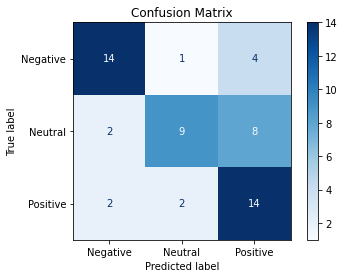

The AUC-ROC Score is : 0.7791673252199569
Random Forest Under Sampling Classification Report:

               precision    recall  f1-score   support

    Negative       0.78      0.74      0.76        19
     Neutral       0.75      0.47      0.58        19
    Positive       0.54      0.78      0.64        18

    accuracy                           0.66        56
   macro avg       0.69      0.66      0.66        56
weighted avg       0.69      0.66      0.66        56



In [19]:
#Using Random Forest Classifier for Under-Sampled Data

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rfc = RandomForestClassifier()
a = rfc.fit(X_train,y_train)

pred1 = rfc.predict(X_test)

# Plotting confusion matrix
cm1 = plot_confusion_matrix(rfc,X_test,y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#AUC-ROC Score
print("The AUC-ROC Score is :", roc_auc_score(y_test,rfc.predict_proba(X_test),multi_class='ovr'))

# Getting the classification report
print("Random Forest Under Sampling Classification Report:\n\n",classification_report(y_test, pred1))


[14:31:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


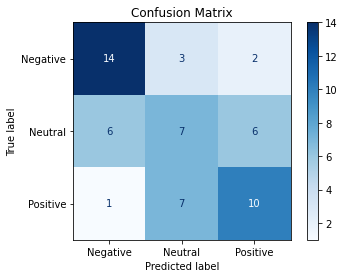

The AUC-ROC Score is : 0.7785943838575418
XG Boost Under Sampling Classification Report:

               precision    recall  f1-score   support

    Negative       0.67      0.74      0.70        19
     Neutral       0.41      0.37      0.39        19
    Positive       0.56      0.56      0.56        18

    accuracy                           0.55        56
   macro avg       0.54      0.55      0.55        56
weighted avg       0.54      0.55      0.55        56



In [20]:
#Using XGBoost Classifier for Under-Sampled Data


from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb = XGBClassifier()
b = xgb.fit(X_train,y_train)

pred2 = xgb.predict(X_test)

# Plotting confusion matrix
cm2 = plot_confusion_matrix(xgb,X_test,y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#AUC-ROC Score
print("The AUC-ROC Score is :", roc_auc_score(y_test,xgb.predict_proba(X_test),multi_class='ovr'))

# Getting the classification report
print("XG Boost Under Sampling Classification Report:\n\n",classification_report(y_test, pred2))


In [21]:
#OverSampling using Random Over Sampler from imbalanced learn
from imblearn.over_sampling import RandomOverSampler


rus = RandomOverSampler(random_state = 0)
#cc.fit(train_X,train_y)
X_resampled1, y_resampled1 = rus.fit_resample(reviews_train_tfidf,train.sentiment)

print(X_resampled1.shape)
print(y_resampled1.shape)

X1_train, X1_test, y1_train, y1_test = train_test_split(X_resampled1,y_resampled1,train_size = 0.8, random_state = 123)

(11247, 3981)
(11247,)


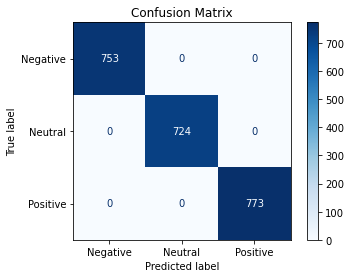

The AUC-ROC Score is : 0.9327198302478092
Random Forest Over Sampling Classification Report:

               precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       753
     Neutral       1.00      1.00      1.00       724
    Positive       1.00      1.00      1.00       773

    accuracy                           1.00      2250
   macro avg       1.00      1.00      1.00      2250
weighted avg       1.00      1.00      1.00      2250



In [22]:
#Using Random Forest Classifier for Over-Sampled Data

rfc1 = RandomForestClassifier()
c = rfc1.fit(X1_train,y1_train)

pred3 = rfc1.predict(X1_test)

# Plotting confusion matrix
cm3 = plot_confusion_matrix(rfc1,X1_test,y1_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#AUC-ROC Score
print("The AUC-ROC Score is :", roc_auc_score(y1_test,rfc.predict_proba(X1_test),multi_class='ovr'))

# Getting the classification report
print("Random Forest Over Sampling Classification Report:\n\n",classification_report(y1_test, pred3))

[14:31:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


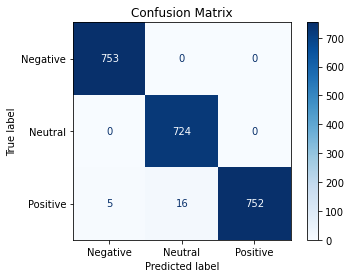

The AUC-ROC Score is : 0.9995841280906963
XGBoost Over Sampling Classification Report:

               precision    recall  f1-score   support

    Negative       0.99      1.00      1.00       753
     Neutral       0.98      1.00      0.99       724
    Positive       1.00      0.97      0.99       773

    accuracy                           0.99      2250
   macro avg       0.99      0.99      0.99      2250
weighted avg       0.99      0.99      0.99      2250



In [23]:
#Using XGBoost Classifier for Over-Sampled Data

xgb1 = XGBClassifier()
d = xgb1.fit(X1_train,y1_train)

pred4 = xgb1.predict(X1_test)

# Plotting confusion matrix
cm4 = plot_confusion_matrix(xgb1,X1_test,y1_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#AUC-ROC Score
print("The AUC-ROC Score is :", roc_auc_score(y1_test,xgb1.predict_proba(X1_test),multi_class='ovr'))

# Getting the classification report
print("XGBoost Over Sampling Classification Report:\n\n",classification_report(y1_test, pred4))


In [24]:
#Accuracy Scores for the above used models
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test,pred1)
score2 = accuracy_score(y_test,pred2)
score3 = accuracy_score(y1_test,pred3)
score4 = accuracy_score(y1_test,pred4)
print("Accuracy Scores:\n Random Forest Under Sampling: {}\n XGBoost Under Sampling: {}\n Random Forest Over Sampling: {}\n XGBoost Over Sampling: {}".format(score1,score2,score3,score4))

Accuracy Scores:
 Random Forest Under Sampling: 0.6607142857142857
 XGBoost Under Sampling: 0.5535714285714286
 Random Forest Over Sampling: 1.0
 XGBoost Over Sampling: 0.9906666666666667


# TASK 3:

In [25]:
## APPLYING LABEL ENCODER
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train['sentiment']= le.fit_transform(train['sentiment'])
train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,2
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,2
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,1
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,2
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,2


In [26]:
from keras.layers import Input,Conv2D,Dense,Conv2DTranspose,LeakyReLU,Reshape
from keras.layers import Flatten,BatchNormalization,MaxPool2D,Dropout, Embedding,LSTM
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer
import tensorflow as tf



In [151]:
#Initialize Tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000)
reviews = train['reviews.text'].tolist()
sentiment = train['sentiment'].tolist()

#Let tokenizer look at all the text
a = tokenizer.fit_on_texts(words_train)

#Vocablury
len(tokenizer.word_index)
#print(a)

3957

In [152]:
#Convert text into numbers
features = tokenizer.texts_to_matrix(reviews, mode='tfidf')
print(features.shape)
print(features)

(4000, 5000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [153]:
#Initialize model, reshape & normalize data
model3 = tf.keras.models.Sequential()

#normalize data
model3.add(tf.keras.layers.BatchNormalization(input_shape=(5000,)))

#Add Dense Layers
model3.add(tf.keras.layers.Dense(200))
model3.add(tf.keras.layers.LeakyReLU())
model3.add(tf.keras.layers.BatchNormalization())

model3.add(tf.keras.layers.Dense(100))
model3.add(tf.keras.layers.LeakyReLU())
model3.add(tf.keras.layers.BatchNormalization())

model3.add(tf.keras.layers.Dense(60))
model3.add(tf.keras.layers.LeakyReLU())
model3.add(tf.keras.layers.BatchNormalization())

model3.add(tf.keras.layers.Dense(30))
model3.add(tf.keras.layers.LeakyReLU())
model3.add(tf.keras.layers.BatchNormalization())

In [154]:
#Output layer
model3.add(tf.keras.layers.Dense(1, activation='softmax'))

In [155]:
#Compile the model
adam_op = tf.keras.optimizers.Adam(lr=0.001, decay=0.001) #momentum=0.9, nesterov=True)
model3.compile(optimizer= adam_op, loss='categorical_crossentropy', metrics=['accuracy'])

In [156]:
#X3_train, X3_test, y3_train, y3_test = train_test_split(features, train['sentiment'], test_size=0.2, random_state=42)


In [33]:
#Convert output labels to multiple values
#y3_train = tf.keras.utils.to_categorical(y3_train)
#y3_test = tf.keras.utils.to_categorical(y3_test)

In [159]:
#Train the model
history3 = model3.fit(features,train['sentiment'], epochs=30,batch_size=16)         
          

Epoch 1/30
250/250 [==============================] - 2s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0395
Epoch 2/30
250/250 [==============================] - 2s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0395
Epoch 3/30
250/250 [==============================] - 2s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0395
Epoch 4/30
250/250 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0395
Epoch 5/30
250/250 [==============================] - 2s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0395
Epoch 6/30
250/250 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 0.0395
Epoch 7/30
250/250 [==============================] - 2s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0395
Epoch 8/30
250/250 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0395
Epoch 9/30
250/250 [==============================] - 1s 6ms/step - loss: 0.0000e+00 - accuracy: 0.0395
Epoch 10/30
250/250 [==============================] - 1s 6ms/st

# TASK - 4:

In [40]:
#Build the tokenizer
top_words = 10000
t = Tokenizer(num_words=top_words) # num_words -> Vocablury size
t.fit_on_texts(reviews)

In [41]:
#Clean text
import re, string

def clean_str(string):
  """
  String cleaning before vectorization
  """
  try:    
    string = re.sub(r'^https?:\/\/<>.*[\r\n]*', '', string, flags=re.MULTILINE)
    string = re.sub(r"[^A-Za-z]", " ", string)         
    words = string.strip().lower().split()    
    words = [w for w in words if len(w)>=1]
    return " ".join(words)
  except:
    return ""

In [42]:
train['clean_review'] = train['reviews.text'].apply(clean_str)
train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,clean_review
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,2,purchased on black fridaypros great price even...
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,2,i purchased two amazon in echo plus and two do...
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,1,just an average alexa option does show a few t...
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,2,very good product exactly what i wanted and a ...
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,2,this is the rd one i ve purchased i ve bought ...


In [43]:
#Get the word index for each of the word in the review
X2_train, X2_test, y2_train, y2_test = train_test_split(train['clean_review'], train['sentiment'], test_size=0.2, random_state=42)
X2_train = t.texts_to_sequences(X2_train.tolist())
X2_test = t.texts_to_sequences(X2_test.tolist())

In [44]:
#Pad Sequences - Important
from tensorflow.python.keras.preprocessing import sequence

max_review_length = 1000
X2_train = sequence.pad_sequences(X2_train,maxlen=max_review_length,padding='post')
X2_test = sequence.pad_sequences(X2_test, maxlen=max_review_length, padding='post')

In [45]:
#List to hold all words in each review
documents = []

#Iterate over each review
for doc in train['clean_review']:
    documents.append(doc.split(' '))

print(len(documents))

4000


In [46]:
import gensim
#Build the model
word2vec = gensim.models.Word2Vec(documents, #Word list
                               min_count=10, #Ignore all words with total frequency lower than this                           
                               workers=4, #Number of CPU Cores
                               size=50,  #Embedding size
                               window=5, #Maximum Distance between current and predicted word
                               iter=10   #Number of iterations over the text corpus
                              )  

In [47]:
embedding_vector_length = word2vec.wv.syn0.shape[1]
embedding_vector_length

50

In [48]:
embedding_matrix = np.zeros((top_words + 1, embedding_vector_length))
embedding_matrix.shape

(10001, 50)

In [49]:
for word, i in sorted(t.word_index.items(),key=lambda x:x[1]):
    if i > top_words:
        break
    if word in word2vec.wv.vocab:
        embedding_vector = word2vec.wv[word]
        embedding_matrix[i] = embedding_vector

In [50]:
model = Sequential()
model.add(Embedding(top_words + 1,
                    embedding_vector_length,
                    input_length=max_review_length,
                   weights=[embedding_matrix],
                   trainable=False)
         )
#Add Layer with 100 LSTM Memory Units

model.add(LSTM(100))
#model.add(LSTM(100))
model.add(Dense(1,activation='softmax'))


In [51]:
opt = Adam(lr=0.01, decay=0.001, beta_1=0.5)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 50)          500050    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               60400     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 560,551
Trainable params: 60,501
Non-trainable params: 500,050
_________________________________________________________________


In [53]:
history = model.fit(X2_train,y2_train,
          epochs=5,
          batch_size=32,          
          validation_data=(X2_test, y2_test))

Epoch 1/5
100/100 [==============================] - 36s 350ms/step - loss: 0.0000e+00 - accuracy: 0.0353 - val_loss: 0.0000e+00 - val_accuracy: 0.0450
Epoch 2/5
100/100 [==============================] - 33s 333ms/step - loss: 0.0000e+00 - accuracy: 0.0424 - val_loss: 0.0000e+00 - val_accuracy: 0.0450
Epoch 3/5
100/100 [==============================] - 32s 318ms/step - loss: 0.0000e+00 - accuracy: 0.0334 - val_loss: 0.0000e+00 - val_accuracy: 0.0450
Epoch 4/5
100/100 [==============================] - 34s 343ms/step - loss: 0.0000e+00 - accuracy: 0.0335 - val_loss: 0.0000e+00 - val_accuracy: 0.0450
Epoch 5/5
100/100 [==============================] - 32s 316ms/step - loss: 0.0000e+00 - accuracy: 0.0353 - val_loss: 0.0000e+00 - val_accuracy: 0.0450


In [55]:
from keras.layers import GRU

model1 = Sequential()
model1.add(Embedding(top_words + 1,
                    embedding_vector_length,
                    input_length=max_review_length,
                   weights=[embedding_matrix],
                   trainable=False)
         )
#Add a layer with 100 GRU units
model1.add(GRU(100))
model1.add(Dense(1,activation='softmax'))

In [115]:
from keras.optimizers import SGD
opt1 = SGD(lr=0.01, decay=0.001) #beta_1=0.5)
model1.compile(optimizer=opt1,loss='categorical_crossentropy',metrics=['accuracy'])

In [116]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 1000, 50)          500050    
_________________________________________________________________
gru (GRU)                    (None, 100)               45600     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 545,751
Trainable params: 45,701
Non-trainable params: 500,050
_________________________________________________________________


In [117]:
history1 = model1.fit(X2_train,y2_train,
          epochs=5,
          batch_size=32,          
          validation_data=(X2_test, y2_test))

Epoch 1/5
100/100 [==============================] - 86s 823ms/step - loss: 0.0000e+00 - accuracy: 0.0352 - val_loss: 0.0000e+00 - val_accuracy: 0.0450
Epoch 2/5
100/100 [==============================] - 29s 287ms/step - loss: 0.0000e+00 - accuracy: 0.0389 - val_loss: 0.0000e+00 - val_accuracy: 0.0450
Epoch 3/5
100/100 [==============================] - 29s 291ms/step - loss: 0.0000e+00 - accuracy: 0.0384 - val_loss: 0.0000e+00 - val_accuracy: 0.0450
Epoch 4/5
100/100 [==============================] - 29s 286ms/step - loss: 0.0000e+00 - accuracy: 0.0303 - val_loss: 0.0000e+00 - val_accuracy: 0.0450
Epoch 5/5
100/100 [==============================] - 29s 287ms/step - loss: 0.0000e+00 - accuracy: 0.0372 - val_loss: 0.0000e+00 - val_accuracy: 0.0450


In [ ]:
#Comparing the accuracies of ML and Neural net models

In [149]:
print("Accuracy Scoresof ML Models:\n Random Forest Under Sampling: {}\n XGBoost Under Sampling: {}\n Random Forest Over Sampling: {}\n XGBoost Over Sampling: {}".format(score1,score2,score3,score4))

Accuracy Scoresof ML Models:
 Random Forest Under Sampling: 0.6607142857142857
 XGBoost Under Sampling: 0.5535714285714286
 Random Forest Over Sampling: 1.0
 XGBoost Over Sampling: 0.9906666666666667


In [169]:
lstm_a = max(history.history['accuracy'])
gru_a = max(history1.history['accuracy'])
dnn_a = max(history3.history['accuracy'])


In [170]:
print("Accuracy Scores of Neural Nets: \n DNN: {}\n LSTM: {}\n GRU: {}".format(dnn_a,lstm_a,gru_a))

Accuracy Scores of Neural Nets: 
 DNN: 0.039500001817941666
 LSTM: 0.039500001817941666
 GRU: 0.03812500089406967


In [118]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [144]:
#Experiment with three hyperparameters in the model:

#Number of units in the first dense layer
#Dropout rate in the dropout layer
#Optimizer

from tensorboard.plugins.hparams import api as hp

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['sgd','adam']))
#HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete([ 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
    hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [145]:
def train_test_model(hparams):
    model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=tf.nn.relu),
     tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
     tf.keras.layers.Dense(10, activation=tf.nn.softmax),
  ])
    model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )

    model.fit(X2_train, y2_train, epochs=1) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(X2_test, y2_test)
    return accuracy

In [146]:
def run(run_dir, hparams):
    with tf.summary.create_file_writer(run_dir).as_default():
        hp.hparams(hparams)  # record the values used in this trial
        accuracy = train_test_model(hparams)
        tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [147]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
    for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
        for optimizer in HP_OPTIMIZER.domain.values:
             hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
        run_name = "run-%d" % session_num
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})
        run('logs/hparam_tuning/' + run_name, hparams)
        session_num += 1

--- Starting trial: run-0
{'num_units': 16, 'dropout': 0.1, 'optimizer': 'sgd'}
25/25 [==============================] - 0s 665us/step - loss: 3.3354 - accuracy: 0.9388
--- Starting trial: run-1
{'num_units': 16, 'dropout': 0.2, 'optimizer': 'sgd'}
25/25 [==============================] - 0s 748us/step - loss: 9.7524 - accuracy: 0.9375
--- Starting trial: run-2
{'num_units': 32, 'dropout': 0.1, 'optimizer': 'sgd'}
25/25 [==============================] - 0s 665us/step - loss: 1.9541 - accuracy: 0.9350
--- Starting trial: run-3
{'num_units': 32, 'dropout': 0.2, 'optimizer': 'sgd'}
25/25 [==============================] - 0s 622us/step - loss: 1.6129 - accuracy: 0.9388


In [148]:
%tensorboard --logdir logs/hparam_tuning

Reusing TensorBoard on port 6006 (pid 13828), started 0:28:59 ago. (Use '!kill 13828' to kill it.)